# Lab 4

Authors: Justin Ventura [[jventura3@gulls.salisbury.edu]] & Blaine Mason

Date: Thursday, October 15th, 2020.

## - Description -

Gamers rise

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer # start = timer(), end = timer()

a_frame = pd.read_csv("adult.data", header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ])
print('a_frame(row, col) =', a_frame.shape)
a_frame.head(9) # Print the first 9 entries.

a_frame(row, col) = (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


## What are the 25th, 50th, 75th percentiles of the education-num field?

As seen below, 25th percentile is 9, 50th percentile is 10, and 75th percentile is 12.

(that is, 25% of the data is at or below 9 years of education)

In [17]:
edu = a_frame[['education-num']]
print(f"%: {edu.quantile([.25, .5, .75])}")

%:       education-num
0.25            9.0
0.50           10.0
0.75           12.0


## What is the probability that an adult makes more than $50k given that their education-num is within the ranges defined by the above quantiles (from 0 to the 25th percentile, from the 25th to the 50th etc)?

Probability of A given B: $ P(A | B) = \frac{P(A, B)}{P(B)}.$  Note that in this case, A and B are not independent.

In [18]:
edu_income = a_frame[['education-num', 'income']]
edu_inc_f_arr = edu_income.to_numpy()

# 25th percentile
low_total = 0 # P(B)
low_upper = 0 # P(A, B)
# 50th percentile
mid_total = 0
mid_upper = 0
# 75th percentile
hi_total = 0
hi_upper = 0

# Elem 0 is edu-num, Elem 1 is income
for elem in edu_inc_f_arr:
    if elem[0] >= 0 and elem[0] <= 9:
        low_total += 1
        if elem[1] == '>50K':
            low_upper += 1
    elif elem[0] > 9 and elem[0] <= 10:
        mid_total += 1
        if elem[1] == '>50K':
            mid_upper += 1
    else:
        hi_total += 1
        if elem[1] == '>50K':
            hi_upper += 1

print(f'25th percentile probability: {low_upper}/{low_total} -> {low_upper/low_total}')
print(f'50th percentile probability: {mid_upper}/{mid_total} -> {mid_upper/mid_total}')
print(f'75th percentile probability: {hi_upper }/{hi_total } -> {hi_upper /hi_total }')

25th percentile probability: 1919/14754 -> 0.13006642266503998
50th percentile probability: 1387/7291 -> 0.19023453572898094
75th percentile probability: 4535/10516 -> 0.4312476226702168


## Plot the change in probability that a person makes more and less than $50k given their years of education.

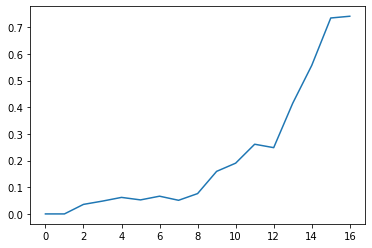

In [57]:
# Create this will be used to track each the number of people
# who make over $50K based off of their education years.
# COLS: represents # of people with that education-num.
# ROWS: 1st row for those who make over $50K
#       2nd row for total who are under that education-num
edu_num_arr = np.zeros((2, 17), dtype=int)
t = np.linspace(0, 16, num=17, endpoint=True)

for elem in edu_inc_f_arr:
    edu_num_arr[(1, elem[0])] += 1
    if elem[1] == '>50K':
        edu_num_arr[(0, elem[0])] += 1

y = np.array([n / d for n, d in zip(edu_num_arr[0], edu_num_arr[1])])
y[0] = 0 # fixes divide by 0

#print(edu_num_arr)
plt.plot(t, y)